In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("tensorflow: ", tf.__version__) #1.14.0

tensorflow:  1.14.0


In [3]:
#import the fashion mnist dataset (from Zalando)
fashion_mnist = keras.datasets.fashion_mnist
data = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
#preprocess the images
train_x = np.expand_dims(train_images/255.0, axis=3)
test_x = np.expand_dims(test_images/255.0, axis=3)

In [16]:
train_y = train_labels
test_y = test_labels

# Miminimze one class

In [17]:
# define function to select only specific category
def select_max_category(data, label, category, max_nr_for_category):
    new_data = []
    new_label = []
    for i in range(len(label)):
        if label[i] == category:
            if len(new_label) <= max_nr_for_category-1:
                new_label.append(label[i])
                new_data.append(data[i])
    #new_data = np.array(new_data)
    #new_label = np.array(new_label)
    return new_data, new_label

In [18]:
#create an array with only the "small class"
all_one_x = train_x[np.where(train_y==1)[0]]
all_one_y = train_y[np.where(train_y==1)[0]]
print(all_one_x.shape, all_one_y.shape)

(6000, 28, 28, 1) (6000,)


In [19]:
#create a set with only zeros in it for experimenting
all_zero_x = test_x[np.where(test_y==0)[0]]
all_zero_y = test_y[np.where(test_y==0)[0]]

In [20]:
# select some pictures of class 1 and define how many
# in the original dataset 7000 images per class are available
rate = 0.005
one_x, one_y = select_max_category(train_x, train_y, 1, 6000*rate)

In [21]:
one_x = np.array(one_x)
one_x.shape

(30, 28, 28, 1)

In [22]:
one_y = np.array(one_y)
one_y.shape

(30,)

In [23]:
#delete class 1 from the training set
train_x = np.delete(train_x, np.where(train_y==1)[0], axis = 0)
print(train_x.shape)

(54000, 28, 28, 1)


In [24]:
train_y = np.delete(train_y, np.where(train_y==1)[0], axis = 0)
print(train_y.shape)

(54000,)


In [25]:
train_x = np.append(train_x, one_x, axis=0)
train_y = np.append(train_y, one_y, axis=0)
#train_y = np.array(pd.get_dummies(train_y)) #onehotencoding

In [26]:
print(train_x.shape, train_y.shape)

(54030, 28, 28, 1) (54030,)


In [27]:
#shuffle the data
n = train_x.shape[0]
## numpy has a shuffle method
permutation = np.arange(n) #n = number of pictures/length of data
np.random.shuffle(permutation)
    
train_x = [train_x[i] for i in permutation]
train_y = [train_y[i] for i in permutation]
#labels_ohe_shuffled = [labels_ohe[i] for i in permutation]

train_x = np.array(train_x)
train_y = np.array(train_y)

train_y = np.array(pd.get_dummies(train_y)) #onehotencoding

In [28]:
print(train_x.shape)
print(train_y.shape)

(54030, 28, 28, 1)
(54030, 10)


# Construct a baseline CNN

In [29]:
model = keras.Sequential([
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1)),
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(16, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout((0.5)),
    keras.layers.Dense(10, activation='softmax')
])

W1114 15:55:34.287859 15836 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                3

In [31]:
history = model.fit(train_x, train_y, epochs = 10)

Epoch 1/10
54030/54030 [==============================] - 64s 1ms/sample - loss: 0.5073 - acc: 0.8166
Epoch 2/10
54030/54030 [==============================] - 68s 1ms/sample - loss: 0.3577 - acc: 0.8714
Epoch 3/10
54030/54030 [==============================] - 66s 1ms/sample - loss: 0.3207 - acc: 0.8837
Epoch 4/10
54030/54030 [==============================] - 66s 1ms/sample - loss: 0.2972 - acc: 0.8924
Epoch 5/10
54030/54030 [==============================] - 64s 1ms/sample - loss: 0.2848 - acc: 0.8951
Epoch 6/10
54030/54030 [==============================] - 64s 1ms/sample - loss: 0.2737 - acc: 0.8998
Epoch 7/10
54030/54030 [==============================] - 64s 1ms/sample - loss: 0.2640 - acc: 0.9022
Epoch 8/10
54030/54030 [==============================] - 69s 1ms/sample - loss: 0.2589 - acc: 0.9050
Epoch 9/10
54030/54030 [==============================] - 63s 1ms/sample - loss: 0.2522 - acc: 0.90781s - loss: 0.2516  - ETA: 0s - loss: 0.2518
Epoch 10/10
54030/54030 [==============

In [32]:
model.save('B_003_model_b.h5') #save the model for the scrumbled data

In [34]:
model = tf.keras.models.load_model('B_003_model_b.h5')

W1114 16:07:10.095200 15836 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1114 16:07:10.098496 15836 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


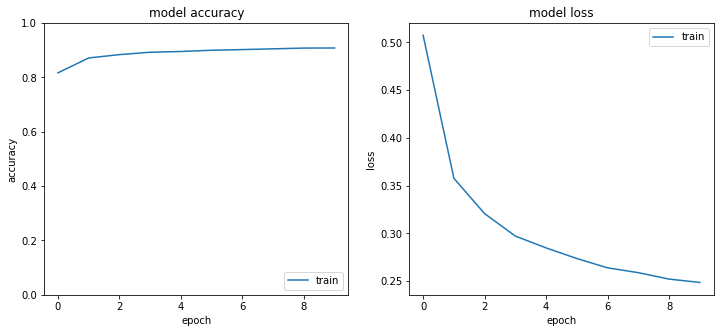

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
#plt.plot(history_b.history['val_accuracy'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
#plt.plot(history_b.history['va_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

# Check the baseline model for a rarely seen picture

In [38]:
picture = 100
picture_end = picture + 1

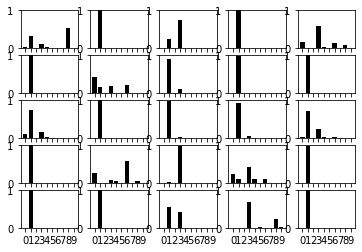

In [36]:
all_one_x.shape
for i in range(800,825,1):
    j = 1+i
    k = i-799
    prediction = model.predict([all_one_x[i:j], 1])[0]
    x = [0,1,2,3,4,5,6,7,8,9]
    plt.subplot(5,5,k)
    plt.bar(x,prediction, color = ['black']) #color=(0.3,0.3,0.3,1.0)
    plt.xticks(x)
    plt.ylim(0,1.0)
    #plt.xticks(np.arange(10), class_names, rotation = 90)
    #plt.title('probabilities predicted')

Text(0.5, 1.0, 'image')

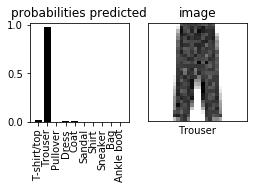

In [39]:
prediction = model.predict([all_one_x[picture:picture_end], 1])[0]
x = [0,1,2,3,4,5,6,7,8,9]
plt.subplot(2,3,1)
plt.bar(x,prediction, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('probabilities predicted')

plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(all_one_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[all_one_y[picture]])
plt.title('image')

# Create a model with MC Dropout

In [40]:
model_mc2 = keras.Sequential([
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1)),
    keras.layers.Dropout((0.3)),
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Dropout((0.3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout((0.3)),
    keras.layers.Convolution2D(16, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Dropout((0.3)),
    keras.layers.Flatten(),
    keras.layers.Dropout((0.3)),
    keras.layers.Dense(10, activation='softmax')
])
model_mc2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_mc2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)       

In [41]:
import tensorflow.keras.backend as K
model_mc2_pred = K.function([model_mc2.input, K.learning_phase()], [model_mc2.output])

In [42]:
history_mc2 = model_mc2.fit(train_x, train_y, epochs = 10)

Epoch 1/10
54030/54030 [==============================] - 108s 2ms/sample - loss: 0.6171 - acc: 0.7725
Epoch 2/10
54030/54030 [==============================] - 99s 2ms/sample - loss: 0.4580 - acc: 0.8322
Epoch 3/10
54030/54030 [==============================] - 97s 2ms/sample - loss: 0.4229 - acc: 0.8458
Epoch 4/10
54030/54030 [==============================] - 106s 2ms/sample - loss: 0.4013 - acc: 0.8516s - 
Epoch 5/10
54030/54030 [==============================] - 99s 2ms/sample - loss: 0.3866 - acc: 0.8572
Epoch 6/10
54030/54030 [==============================] - 99s 2ms/sample - loss: 0.3738 - acc: 0.8629A:
Epoch 7/10
54030/54030 [==============================] - 104s 2ms/sample - loss: 0.3641 - acc: 0.8679
Epoch 8/10
54030/54030 [==============================] - 97s 2ms/sample - loss: 0.3628 - acc: 0.8653
Epoch 9/10
54030/54030 [==============================] - 95s 2ms/sample - loss: 0.3569 - acc: 0.8695
Epoch 10/10
54030/54030 [==============================] - 97s 2ms/sample

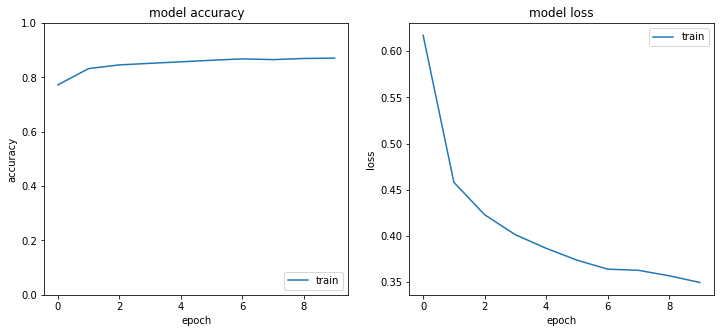

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_mc2.history['acc'])
#plt.plot(history_b.history['val_accuracy'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history_mc2.history['loss'])
#plt.plot(history_b.history['va_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [44]:
model_mc2.save('B_003_model_mc2.h5')

In [45]:
model_mc2 = tf.keras.models.load_model('B_003_model_mc2.h5')

## predictions for a rarely seen image (trousers)

In [46]:
import tensorflow.keras.backend as K
model_mc2_pred = K.function([model_mc2.input, K.learning_phase()], [model_mc2.output])

In [47]:
picture = 100
picture_end = picture+1
model_mc2_pred([all_one_x[picture:picture_end], 1])[0]

array([[3.5673196e-03, 9.8497564e-01, 2.4845533e-05, 4.6049142e-03,
        5.3377533e-03, 8.5761812e-08, 1.4449408e-03, 4.8662235e-10,
        4.4543445e-05, 2.7052462e-09]], dtype=float32)

(100, 10)


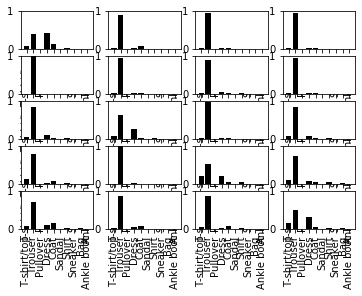

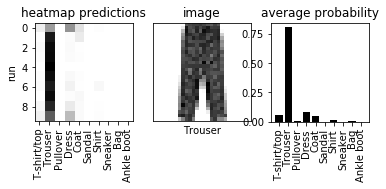

[5.6342874e-02 8.0623263e-01 5.3629477e-04 7.7859357e-02 4.7705278e-02
 7.9807533e-06 1.0075903e-02 3.1182662e-06 1.2361110e-03 7.0173627e-07]


In [48]:
x = [0,1,2,3,4,5,6,7,8,9]
predictions = model_mc2_pred([all_one_x[picture:picture_end], 1])[0]
for i in range(700,799,1):
    pred = model_mc2_pred([all_one_x[picture:picture_end], 1])[0]
    #print(pred)
    predictions = np.append(predictions, pred, axis = 0)
    #print(i, predictions)

print(predictions.shape)

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(10), class_names, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()

plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:10], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(all_one_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[all_one_y[picture]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
#x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

## prediction for an often seen image (class 0)

(100, 10)


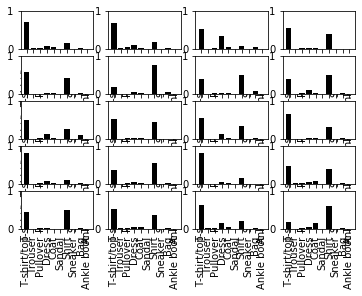

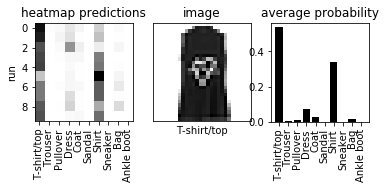

[5.3747344e-01 1.7708773e-03 1.0294553e-02 7.0692822e-02 2.5475182e-02
 6.4411142e-06 3.4110504e-01 7.2927134e-05 1.3102195e-02 6.4792894e-06]


In [49]:
x = [0,1,2,3,4,5,6,7,8,9]
predictions = model_mc2_pred([all_zero_x[picture:picture_end], 1])[0]
for i in range(700,799,1):
    pred = model_mc2_pred([all_zero_x[picture:picture_end], 1])[0]
    #print(pred)
    predictions = np.append(predictions, pred, axis = 0)
    #print(i, predictions)

print(predictions.shape)

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(10), class_names, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()

plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:10], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(all_zero_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[all_zero_y[picture]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
#x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

# Evaluate the two models

## Construct a prediction function to work with the BNN

In [50]:
def uncertainty_predict(picture, prediction_function, number_of_classes, number_of_predictions):
    n = number_of_predictions
    m = number_of_classes
    
    # create an empty list to store the predictions in, the maximal probability is the predicted class
    l = []
    for i in range(n):
        predictions = prediction_function([picture, 1])[0]
        l.append(predictions.argmax())
    
    #create a list to store the purity values in
    p = []
    for j in range(m):
        purity = l.count(j)/n
        p.append(purity)
    
    return l, p

In [51]:
def predict(dataset, prediction_function, number_of_classes, number_of_predictions, max_deviation=0, additional_class=None):
    #create a list to store the results in
    if additional_class == None:
        e = number_of_classes + 1 #to mark a datapoint which network is not certain about
    else: 
        e = additional_class
        
    r = []
    cl = [] # create a  list just with the classes
    n = dataset.shape[0] #number of datapoints in the dataset

    for i in range(n):
        probabilities = uncertainty_predict(dataset[i:i+1], prediction_function, number_of_classes, number_of_predictions)[1]
        p = max(probabilities)
        v = round(p*(1-p), 2)
        s = round(v**(1/2), 2)
        # get the class
        c = probabilities.index(max(probabilities))
        # get the class if uncertainty is set
        
        if max_deviation == 0:
            d = c
        else:
            if s > max_deviation:
                d = e
            else:
                d = c
        #d = c
        
        r.append([c, d, p, v, s])
        
        cl.append(d)
        
    return r, cl

## evaluate baseline CNN

In [52]:
# evaluate the baseline CNN on the test dataset
test_y_ohe = np.array(pd.get_dummies(test_y))
model.evaluate(test_x, test_y_ohe)

10000/10000 [==============================] - 4s 449us/sample - loss: 0.3457 - acc: 0.9024


[0.345709493637085, 0.9024]

In [53]:
# evaluate the baseline CNN on the rarely seen pictures only
l = []
for i in range(all_one_x.shape[0]):
    pred = model.predict(all_one_x[i:i+1])
    l.append(pred.argmax())

In [54]:
(l == all_one_y).sum()/all_one_x.shape[0]

0.8563333333333333

## evaluate the BNN with the standard prediction method

In [55]:
test_y_ohe = np.array(pd.get_dummies(test_y))
model_mc2.evaluate(test_x, test_y_ohe)

10000/10000 [==============================] - 5s 453us/sample - loss: 0.3590 - acc: 0.8778


[0.359042479467392, 0.8778]

In [56]:
# evaluate the BNN with standard prediction on the rarely seen pictures only
l = []
for i in range(all_one_x.shape[0]):
    pred = model_mc2.predict(all_one_x[i:i+1])
    l.append(pred.argmax())

In [57]:
(l == all_one_y).sum()/all_one_x.shape[0]

0.8863333333333333

# evaluate the BNN with special prediction method

In [58]:
# test without taking uncertainty into consideration
foo, classes = predict(test_x, model_mc2_pred, 10, 25)

In [59]:
(test_y == classes).sum()/test_x.shape[0] 
#85.46% accuracy in test mit default deviation value #mit Abweichung von 0.4 sind es noch 78.38%

0.8839

In [60]:
# see what happens if we take uncertainty into consideration and we assign all the uncertain pictures the class 1
foo, classes = predict(test_x, model_mc2_pred, 10, 25, 0.4, 1)

In [61]:
(test_y == classes).sum()/test_x.shape[0]
#74.01% accuracy

0.8107